In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FraudData.csv')
df = df.dropna()

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
import sklearn

In [7]:
from sklearn.preprocessing import RobustScaler

df['scaled_amount'] = RobustScaler().fit_transform(df['amount'].values.reshape(-1,1))
df['scaled_step'] = RobustScaler().fit_transform(df['step'].values.reshape(-1,1))
# df['scaled_time'] = RobustScaler().fit_transform(df['step'].values.reshape(-1,1))
df['scaled_oldBalOrig'] = RobustScaler().fit_transform(df['oldbalanceOrg'].values.reshape(-1,1))
df['scaled_newBalOrig'] = RobustScaler().fit_transform(df['newbalanceOrig'].values.reshape(-1,1))
df['scaled_oldBalDest'] = RobustScaler().fit_transform(df['oldbalanceDest'].values.reshape(-1,1))
df['scaled_newBalDest'] = RobustScaler().fit_transform(df['newbalanceDest'].values.reshape(-1,1))

In [8]:
df.drop(['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'step'], axis=1, inplace=True)

In [9]:
df.head()

,type,nameOrig,nameDest,isFraud,isFlaggedFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
0,PAYMENT,C1231006815,M1979787155,0,0,-0.332932,-1.329609,1.452991,1.111175,-0.140722,-0.193057
1,PAYMENT,C1666544295,M2044282225,0,0,-0.373762,-1.329609,0.065610,0.134375,-0.140722,-0.193057
2,TRANSFER,C1305486145,C553264065,1,0,-0.382380,-1.329609,-0.130708,0.000000,-0.140722,-0.193057
3,CASH_OUT,C840083671,C38997010,1,0,-0.382380,-1.329609,-0.130708,0.000000,-0.118260,-0.193057
4,PAYMENT,C2048537720,M1230701703,0,0,-0.323571,-1.329609,0.254820,0.207169,-0.140722,-0.193057


In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import time

In [11]:
print('Percentage of Fraudulent Transactions = ', df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print('Percentage of Legitimate Transactions = ', df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

Percentage of Fraudulent Transactions =  99.87091795518198
Percentage of Legitimate Transactions =  0.12908204481801522


In [12]:
ce_OHE = ce.OneHotEncoder(cols=['type'])

df = ce_OHE.fit_transform(df)
df.head()

,type_1,type_2,type_3,type_4,type_5,nameOrig,nameDest,isFraud,isFlaggedFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
0,1,0,0,0,0,C1231006815,M1979787155,0,0,-0.332932,-1.329609,1.452991,1.111175,-0.140722,-0.193057
1,1,0,0,0,0,C1666544295,M2044282225,0,0,-0.373762,-1.329609,0.065610,0.134375,-0.140722,-0.193057
2,0,1,0,0,0,C1305486145,C553264065,1,0,-0.382380,-1.329609,-0.130708,0.000000,-0.140722,-0.193057
3,0,0,1,0,0,C840083671,C38997010,1,0,-0.382380,-1.329609,-0.130708,0.000000,-0.118260,-0.193057
4,1,0,0,0,0,C2048537720,M1230701703,0,0,-0.323571,-1.329609,0.254820,0.207169,-0.140722,-0.193057


In [13]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [14]:
df = df.sample(frac=1) #this shuffles the dataset

fraud_df = df.loc[df['isFraud'] == 1]
legit_df = df.loc[df['isFraud'] == 0][:len(fraud_df)] #so that we have equal number of frauds and legits

eq_df = pd.concat([fraud_df, legit_df])

new_df = eq_df.sample(frac=1, random_state=5)

new_df.head()

,type_1,type_2,type_3,type_4,type_5,nameOrig,nameDest,isFraud,isFlaggedFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
6283809,0,0,1,0,0,C1590395791,C1505080875,1,0,44.312927,2.340782,81.222367,0.000000,0.131208,7.889473
6296628,0,1,0,0,0,C1212154134,C426812212,1,0,-0.055231,2.430168,0.464758,0.000000,-0.140722,-0.193057
3087990,0,0,1,0,0,C1381007137,C1307242728,0,0,0.215738,-0.022346,-0.126087,0.000000,1.328283,1.158076
4758632,0,0,1,0,0,C1476026291,C115436929,0,0,0.068527,0.525140,3.060037,1.763078,0.543997,0.467045
1030538,0,0,1,0,0,C1282533102,C672637887,1,0,2.073497,-0.938547,4.339405,0.000000,1.556009,1.677574


In [15]:
df = df.drop(columns='isFlaggedFraud')
df.head()

,type_1,type_2,type_3,type_4,type_5,nameOrig,nameDest,isFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
3166999,0,0,1,0,0,C253834342,C1262169546,0,0.046045,-0.011173,0.335311,0.000000,6.193662,5.254710
909308,1,0,0,0,0,C2104289519,M1894990391,0,-0.377653,-1.094972,-0.132395,0.000000,-0.140722,-0.193057
5414224,1,0,0,0,0,C1528371066,M1513210762,0,-0.366222,0.776536,-0.132395,0.000000,-0.140722,-0.193057
4194884,0,0,0,0,1,C994923099,C1008363046,0,0.290271,0.368715,50.332017,38.452997,1.080959,0.724750
4873135,0,0,1,0,0,C1806689258,C972715809,0,0.894966,0.608939,-0.132395,0.000000,0.979267,1.067977


In [16]:
sns.set(font_scale=1, rc={'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.labelsize': 10})

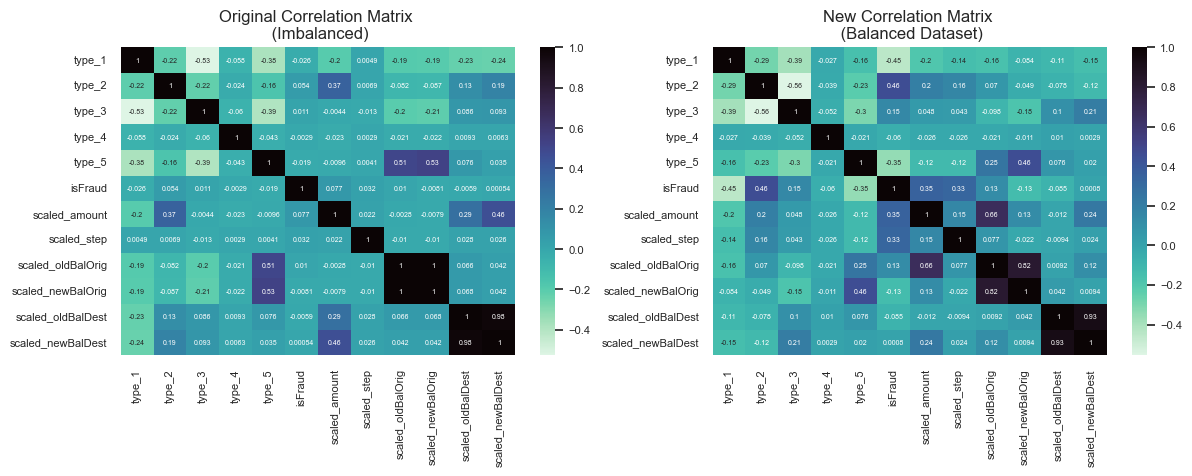

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 4))

columns_to_include = df.columns[~df.columns.isin(['nameOrig', 'nameDest'])]
df_without_type = df[columns_to_include]

# Entire DataFrame
corr = df_without_type.corr()
sns.heatmap(corr, cmap='mako_r', annot=True, annot_kws={'size':5}, ax=ax1)
ax1.set_title("Original Correlation Matrix \n (Imbalanced)")

new_df_without_type = new_df[columns_to_include]
sub_sample_corr = new_df_without_type.corr()
sns.heatmap(sub_sample_corr, cmap='mako_r', annot=True, annot_kws={'size':5}, ax=ax2)

ax2.set_title('New Correlation Matrix \n (Balanced Dataset)')
plt.show()

In [18]:
Q1 = df["scaled_amount"].quantile(0.25)
Q3 = df["scaled_amount"].quantile(0.75)
IQR = Q3 - Q1
x_iqr = 4/2 

outlier_indices = (new_df["scaled_amount"] < (Q1 - 2 * x_iqr)) | (new_df["scaled_amount"] > (Q3 + x_iqr* IQR))

new_df = new_df.loc[~outlier_indices]

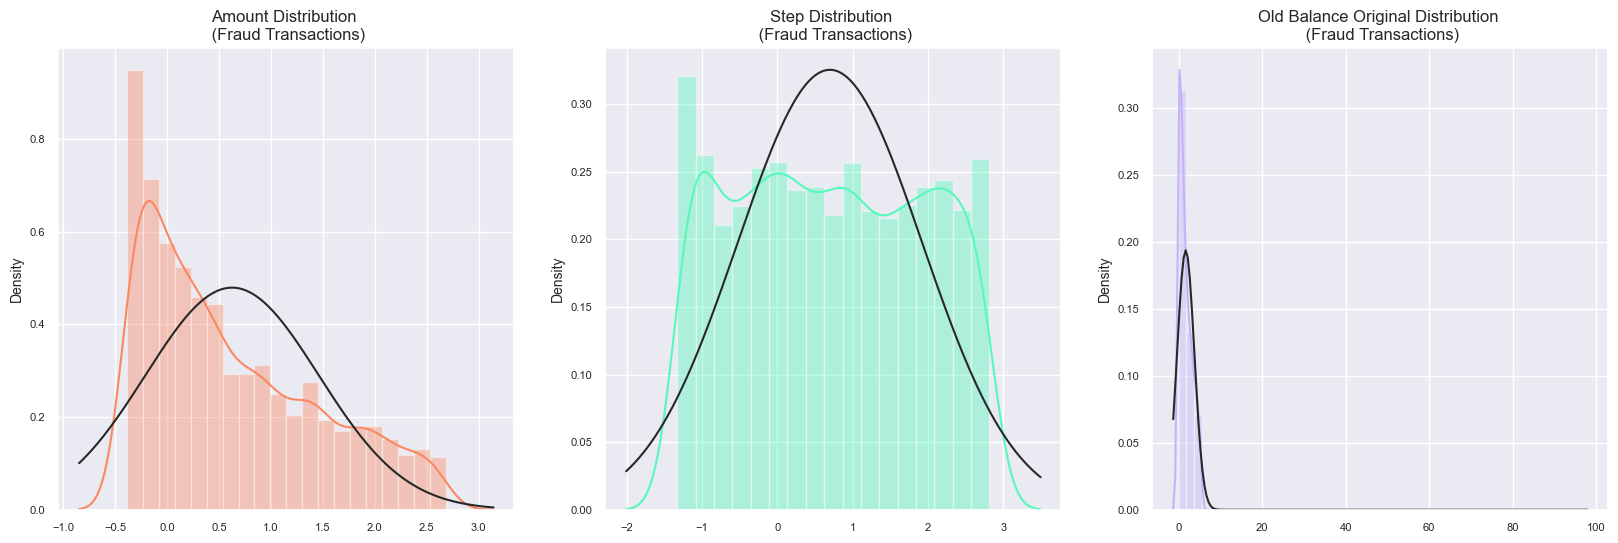

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

amount_fraud_dist = new_df['scaled_amount'].loc[new_df['isFraud'] == 1].values
sns.distplot(amount_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Amount Distribution \n (Fraud Transactions)')

step_fraud_dist = new_df['scaled_step'].loc[new_df['isFraud'] == 1].values
sns.distplot(step_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Step Distribution \n (Fraud Transactions)')

# Old Original Balance Distribution
oldbalorig_fraud_dist = new_df['scaled_oldBalOrig'].loc[new_df['isFraud'] == 1].values
sns.distplot(oldbalorig_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Old Balance Original Distribution \n (Fraud Transactions)')

plt.show()

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA
import time

In [21]:
X = new_df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = new_df['isFraud']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=5).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=5).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=5).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.2e+01 s
PCA took 1.1 s
Truncated SVD took 1.2 s


In [22]:
import matplotlib.patches as patches

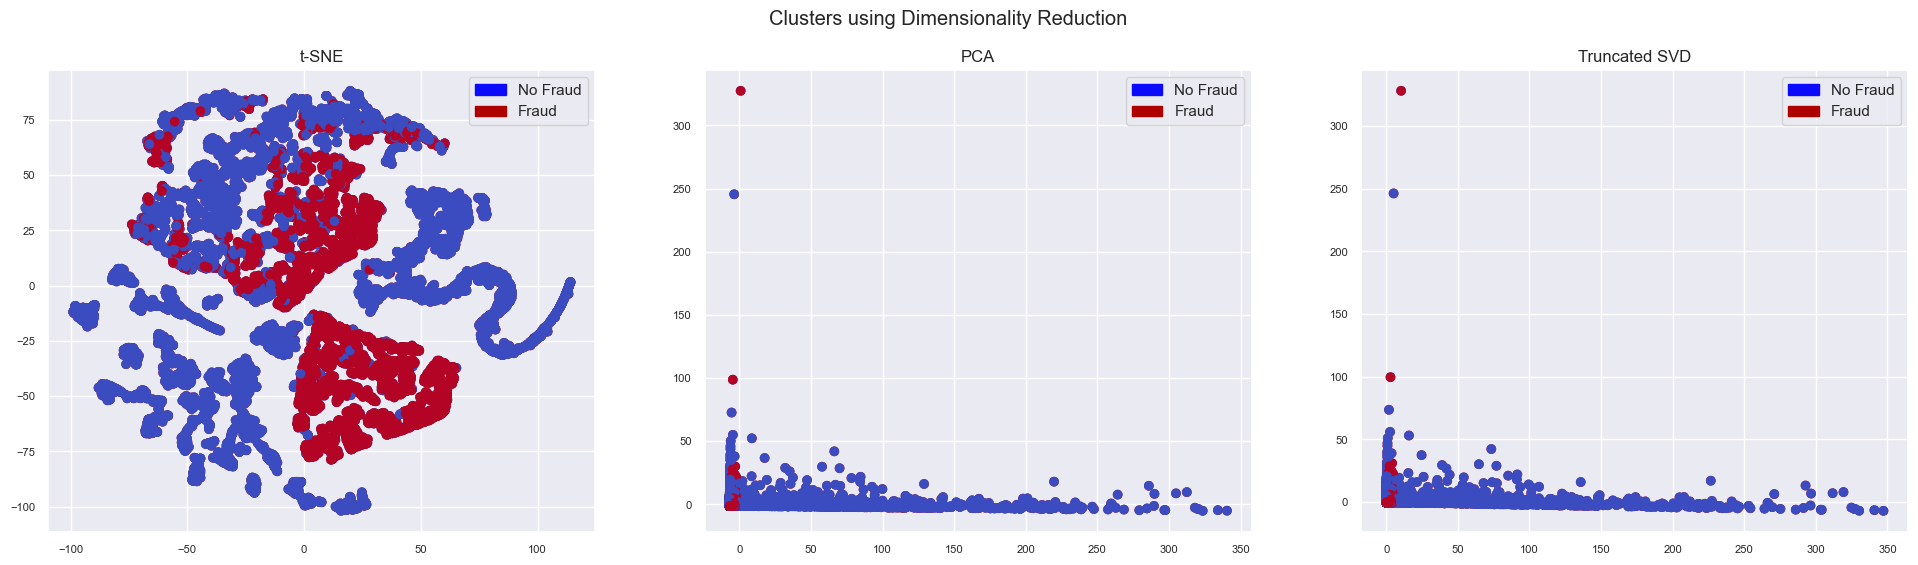

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction')

blue_patch = patches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = patches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax1.set_title('t-SNE')
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax2.set_title('PCA')
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud')
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud')
ax3.set_title('Truncated SVD')
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [24]:
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.head()

,type_1,type_2,type_3,type_4,type_5,nameOrig,nameDest,isFlaggedFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
4929393,1,0,0,0,0,C2061929890,M1138381692,0,-0.304735,0.620112,0.201733,0.142172,-0.140722,-0.193057
2945798,0,1,0,0,0,C80387919,C1965664830,0,-0.137167,-0.050279,0.315620,0.000000,-0.140722,-0.193057
6074069,0,1,0,0,0,C744665522,C299290002,0,1.389539,1.547486,3.094485,0.000000,-0.140722,-0.193057
6328188,0,0,0,0,1,C248963347,C1633650871,0,-0.315799,2.508380,9.234774,7.059733,-0.083833,-0.156667
45892,0,1,0,0,0,C1318697547,C663929766,0,1.674634,-1.284916,-0.132395,0.000000,3.002899,2.834646


In [25]:
X_train = X_train.drop([ 'nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
X_test = X_test.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
y_train = y_train
y_test = y_test

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

In [31]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression has a training score of 96.0 % accuracy score
KNeighborsClassifier has a training score of 96.0 % accuracy score
SVC has a training score of 91.0 % accuracy score
DecisionTreeClassifier has a training score of 99.0 % accuracy score
GradientBoostingClassifier has a training score of 99.0 % accuracy score


In [32]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"solver": ['liblinear', 'saga'], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Logistic Regression best parameters
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [33]:
#gradient boosting
gradboost_params = {}
grid_gradboost = GridSearchCV(GradientBoostingClassifier(), gradboost_params)
grid_gradboost.fit(X_train, y_train)
gradboost_neighbors = grid_gradboost.best_estimator_

In [34]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('knn Classifier Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

gradboost_score = cross_val_score(gradboost_neighbors, X_train, y_train, cv=5)
print('Gradient Boosting Cross Validation Score', round(gradboost_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  96.75%
knn Classifier Cross Validation Score 95.81%
Support Vector Classifier Cross Validation Score 96.31%
DecisionTree Classifier Cross Validation Score 90.83%
Gradient Boosting Cross Validation Score 98.56%


In [35]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [36]:
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=5)
# plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

<h4>We can see that in Decision Tree has the highest training score of 99%, but in Cross Validation, its accuracy is third best with score of 92.86%. This suggests that the model is highly sensititve to changes in the training data i.e. the model has high variance. 
Considering all factors, K Nearest Neighbours gives us the best result. It has the second highest training accuracy score and the highest cross validation score.</h4>

In [37]:
from sklearn.metrics import precision_recall_curve, accuracy_score

y_prob = gradboost_neighbors.predict_proba(X_train)

precision, recall, threshold = precision_recall_curve(y_train, y_prob[:, 1])

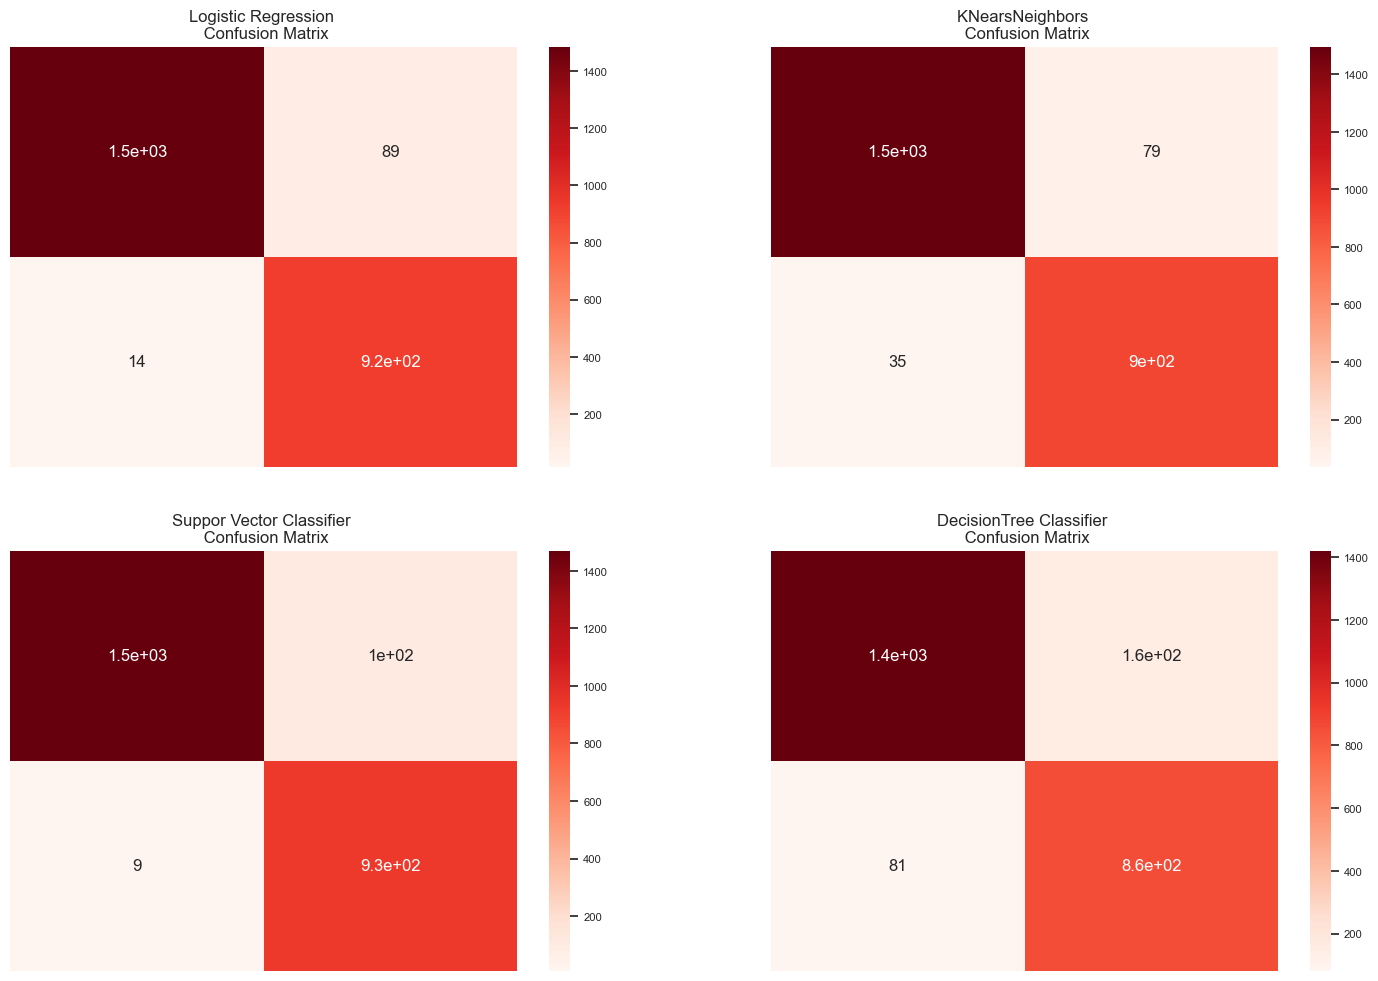

In [38]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_gradboost = gradboost_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
gradboost_cf = confusion_matrix(y_test, y_pred_gradboost)
knears_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(18,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.Reds)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix")
ax[0, 0].set_xticklabels(['', ''], rotation=90)
ax[0, 0].set_yticklabels(['', ''], rotation=360)

sns.heatmap(knears_cf, ax=ax[0][1], annot=True, cmap=plt.cm.Reds)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix")
ax[0][1].set_xticklabels(['', ''], rotation=90)
ax[0][1].set_yticklabels(['', ''], rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.Reds)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix")
ax[1][0].set_xticklabels(['', ''], rotation=90)
ax[1][0].set_yticklabels(['', ''], rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.Reds)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix")
ax[1][1].set_xticklabels(['', ''], rotation=90)
ax[1][1].set_yticklabels(['', ''], rotation=360)


plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score

avg_precision = precision_score(y_test, y_pred_log_reg, average="weighted")
avg_recall = recall_score(y_test, y_pred_log_reg, average="weighted")
print(f"For Logistic Regression:- \nAverage Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

For Logistic Regression:- 
Average Precision: 0.9613, Average Recall: 0.9590


In [40]:
avg_precision = precision_score(y_test, y_pred_knear, average="weighted")
avg_recall = recall_score(y_test, y_pred_knear, average="weighted")
print(f"For KNN:- \nAverage Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

For KNN:- 
Average Precision: 0.9556, Average Recall: 0.9546


In [41]:
avg_precision = precision_score(y_test, y_pred_svc, average="weighted")
avg_recall = recall_score(y_test, y_pred_svc, average="weighted")
print(f"For Support Vector Classification:- \nAverage Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

For Support Vector Classification:- 
Average Precision: 0.9583, Average Recall: 0.9546


In [42]:
avg_precision = precision_score(y_test, y_pred_tree, average="weighted")
avg_recall = recall_score(y_test, y_pred_tree, average="weighted")
print(f"For Decision Tree:- \nAverage Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

For Decision Tree:- 
Average Precision: 0.9090, Average Recall: 0.9061


In [43]:
avg_precision = precision_score(y_test, y_pred_gradboost, average="weighted")
avg_recall = recall_score(y_test, y_pred_gradboost, average="weighted")
print(f"For Gradient Boosting:- \nAverage Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

For Gradient Boosting:- 
Average Precision: 0.9855, Average Recall: 0.9853


In [44]:
print(log_reg_cf)
print(knears_cf)
print(svc_cf)
print(tree_cf)
print(gradboost_cf)

[[1485   89]
 [  14  924]]
[[1495   79]
 [  35  903]]
[[1469  105]
 [   9  929]]
[[1419  155]
 [  81  857]]
[[1545   29]
 [   8  930]]


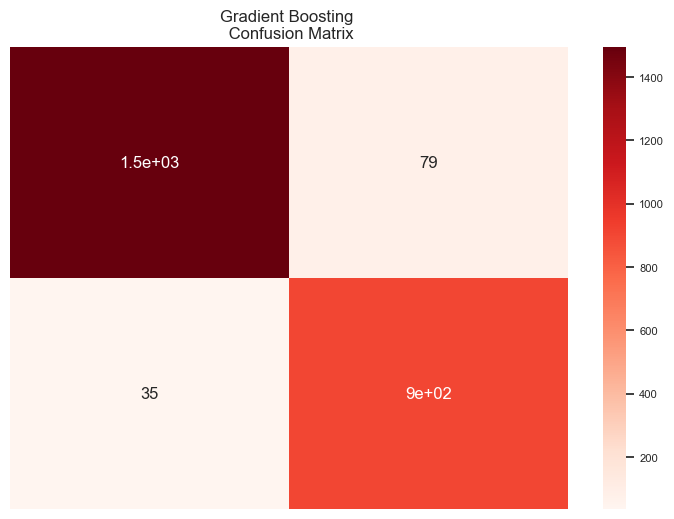

In [45]:
from sklearn.metrics import confusion_matrix

y_pred_knear = knears_neighbors.predict(X_test)

kneighbors_cf = confusion_matrix(y_test, y_pred_knear)


fig, ax = plt.subplots(figsize=(9,6))

sns.heatmap(kneighbors_cf, annot=True, cmap=plt.cm.Reds)
ax.set_title("Gradient Boosting \n Confusion Matrix")
ax.set_xticklabels(['', ''], rotation=90)
ax.set_yticklabels(['', ''], rotation=360)


plt.show()

In [46]:
df_without_type.head()

,type_1,type_2,type_3,type_4,type_5,isFraud,scaled_amount,scaled_step,scaled_oldBalOrig,scaled_newBalOrig,scaled_oldBalDest,scaled_newBalDest
3166999,0,0,1,0,0,0,0.046045,-0.011173,0.335311,0.000000,6.193662,5.254710
909308,1,0,0,0,0,0,-0.377653,-1.094972,-0.132395,0.000000,-0.140722,-0.193057
5414224,1,0,0,0,0,0,-0.366222,0.776536,-0.132395,0.000000,-0.140722,-0.193057
4194884,0,0,0,0,1,0,0.290271,0.368715,50.332017,38.452997,1.080959,0.724750
4873135,0,0,1,0,0,0,0.894966,0.608939,-0.132395,0.000000,0.979267,1.067977


In [47]:
X_full = df_without_type.drop('isFraud', axis=1).values
y_full = df_without_type['isFraud'].values

y_full_pred = gradboost_neighbors.predict(X_full)

accuracy = accuracy_score(y_full, y_full_pred)
print(accuracy)

0.9811233422709513


In [48]:
print('The accuracy score on predicting the model over the complete database is ' , np.round(accuracy*100, 3) , "%")

The accuracy score on predicting the model over the complete database is  98.112 %
